In [15]:
# Importation des bibliothèques principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des fonctions de manipulation des données
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, Binarizer, KBinsDiscretizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator


# Importation des métriques
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, median_absolute_error

### Impute
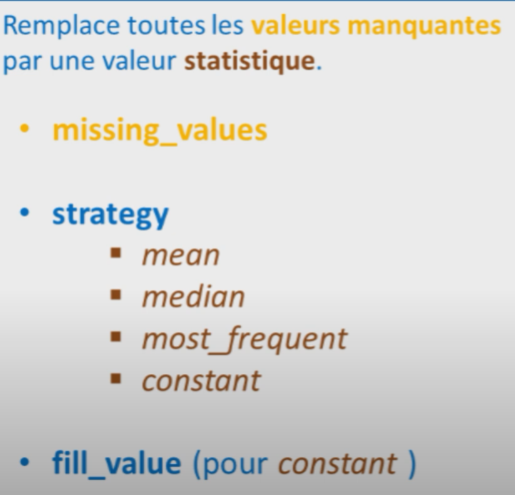 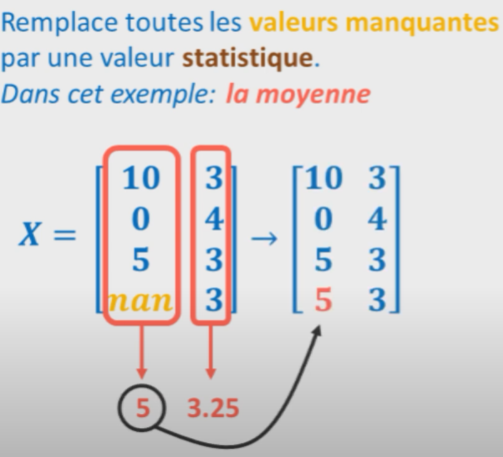


In [11]:
X_train = np.array([
    [10, 3],
    [0, 4],
    [5, 3],
    [np.nan, np.nan]
])
print(X_train)
#function(missing_values=valeurs à changer, strategy="stratégie pour changer les colonnes")
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit_transform(X_train)

X_test = np.array([
    [10, 3],
    [0, 4],
    [5, 3],
    [np.nan, np.nan]
])
#Remplace les nan par les moyennes(calculées sur X_train)
imputer.transform(X_test)

[[10.  3.]
 [ 0.  4.]
 [ 5.  3.]
 [nan nan]]


array([[10.        ,  3.        ],
       [ 0.        ,  4.        ],
       [ 5.        ,  3.        ],
       [ 5.        ,  3.33333333]])

## KNNImputer

Remplace les valeurs manquantes par les valeurs des plus proches voisins
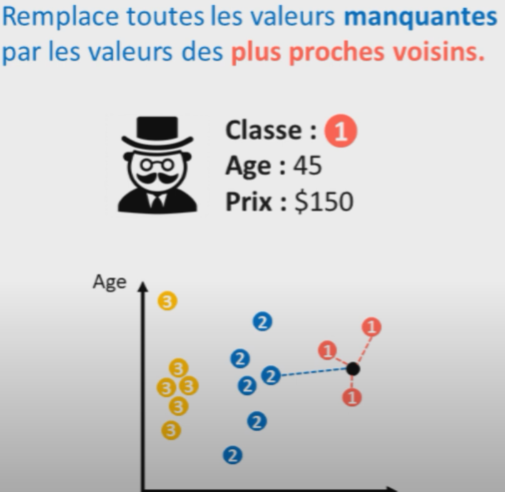

In [13]:
X = np.array([
    [1, 100],
    [2, 30],
    [3, 15],
    [np.nan, 20]
])

In [14]:
imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(X)

array([[  1., 100.],
       [  2.,  30.],
       [  3.,  15.],
       [  3.,  20.]])

## MissingIndicator

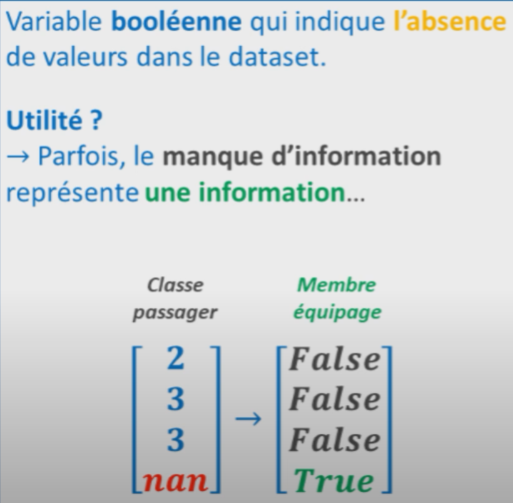

In [22]:
X = np.array([
    [1, 100],
    [2, 30],
    [3, 15],
    [np.nan, np.nan]
])

In [21]:
MissingIndicator().fit_transform(X)

array([[False, False],
       [False, False],
       [False, False],
       [ True,  True]])

In [ ]:
#Crée une pipeline avec deux transformer s'appliquant en même temps: SimpleImputer(strategy="constant", fill_value=-99) remplace toutes les valeurs manquantes (np.nan) par -99.
#MissingIndicator() crée un tableau binaire (0 ou 1) indiquant la présence de valeurs manquantes (1 si la valeur était manquante, 0 sinon).
pipeline = make_union(SimpleImputer(strategy="constant", fill_value=-99), MissingIndicator())
pipeline.fit_transform(X)

array([[  1., 100.,   0.,   0.],
       [  2.,  30.,   0.,   0.],
       [  3.,  15.,   0.,   0.],
       [-99., -99.,   1.,   1.]])